# Graded lab session 5 | Deep classification on Fashion-MNIST using pytorch

pierre-henri.conze@imt-atlantique.fr \\
francois.rousseau@imt-atlantique.fr \\
aurelien.colin@imt-atlantique.fr \\
simon.benaichouche@imt-atlantique.fr

---



#### **Student name** = [TO BE COMPLETED] 

### Objective of this lab session: perform classification on Fashion-MNIST using multi-layer perceptron, convolutional neural networks and transfer learning to obtain the best classification results as possible.

#### Challenge: the first 3 students in terms of overall test accuracy results (whatever the methodology used) will obtain bonus points!

### Table of Contents

* [Data management](#section_1)
    * [Question 1.1](#question_1_1)
    * [Question 1.2](#question_1_2)
    * [Question 1.3](#question_1_3)
    * [Question 1.4](#question_1_4)
* [Multi-Layer Perceptron](#section_2)    
    * [Question 2.1](#question_2_1)
    * [Question 2.2](#question_2_2)
    * [Question 2.3](#question_2_3)
    * [Question 2.4](#question_2_4)
    * [Question 2.5](#question_2_5)
* [Convolutional neural network](#section_3)    
    * [Question 3.1](#question_3_1)
    * [Question 3.2](#question_3_2)
    * [Question 3.3](#question_3_3)
    * [Question 3.4](#question_3_4)
    * [Question 3.5](#question_3_5)
    * [Question 3.6](#question_3_6)
    * [Question 3.7](#question_3_7)
* [Transfer learning from ImageNet](#section_4)    
    * [Question 4.1](#question_4_1)
    * [Question 4.2](#question_4_2)
    * [Question 4.3](#question_4_3)
    * [Question 4.4](#question_4_4)
    * [Question 4.5](#question_4_5)
* [Challenge](#section_5)    
    * [Question 5.1](#question_5_1)

## 1- Data management <a class="anchor" id="section_1"></a>

Start with these lines of code to automatically download the Fashion-MNIST dataset.

In [3]:
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root = 'data', train = True, download = True, transform = transform)
test_data = datasets.FashionMNIST(root = 'data', train = False, download = True, transform = transform)

D:\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### **Question 1.1** - Fashion-MNIST is a dataset consisting of a training set of A examples and a test set of B examples. Each example is a CxC grayscale image, associated with a label from D classes. What are the values for A, B, C and D? <a class="anchor" id="question_1_1"></a>

In [5]:
num_train, num_test = len(train_data), len(test_data)
print('A = number of training data =', num_train, '\n'+'B = number of test data =', num_test)
#images, labels = data_iter.next() # obtain one batch from the train set
#images = images.numpy()
# ? num_pixel = len(np.squeeze(images[1]))
num_pixel = 28
num_class = len(train_data.classes)
print('C = number of pixel =', num_pixel, '\n'+'D = number of class =', num_class)


A = number of training data = 60000 
B = number of test data = 10000
C = number of pixel = 28 
D = number of class = 10


As indicated below, each Fashion-MNIST sample is assigned to one of the following classes: 0: T-shirt/top, 1: Trouser, 2: Pullover, 3: Dress, 4: Coat, 5: Sandal, 6: Shirt, 7: Sneaker, 8: Bag, 9: Ankle boot.

In [6]:
class_names = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#### **Question 1.2** - Complete the following cell to create data loaders ([documentation](https://pytorch.org/docs/stable/data.html)) for training, validation and test sets. <a class="anchor" id="question_1_2"></a>

In [7]:
import torch
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

batch_size = 20
valid_size = 0.2

def create_data_loaders(batch_size, valid_size, train_data, test_data): # FUNCTION TO BE COMPLETED
  # obtain training indices that will be used for validation
  indices = list(range(num_train))
  np.random.shuffle(indices)
  split = int(np.floor(valid_size * num_train))
  train_index, valid_index = indices[split:], indices[:split]

  # define samplers for obtaining training and validation batches
  train_sampler = SubsetRandomSampler(train_index)
  valid_sampler = SubsetRandomSampler(valid_index)

  # prepare data loaders
  test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)
  train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = train_sampler)
  valid_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = valid_sampler)
  
  return train_loader, valid_loader, test_loader

In [8]:
train_loader, valid_loader, test_loader = create_data_loaders(batch_size, valid_size, train_data, test_data) # TO DO

#### **Question 1.3** - Visualize some images from the training set with corresponding ground truth labels. <a class="anchor" id="question_1_3"></a>

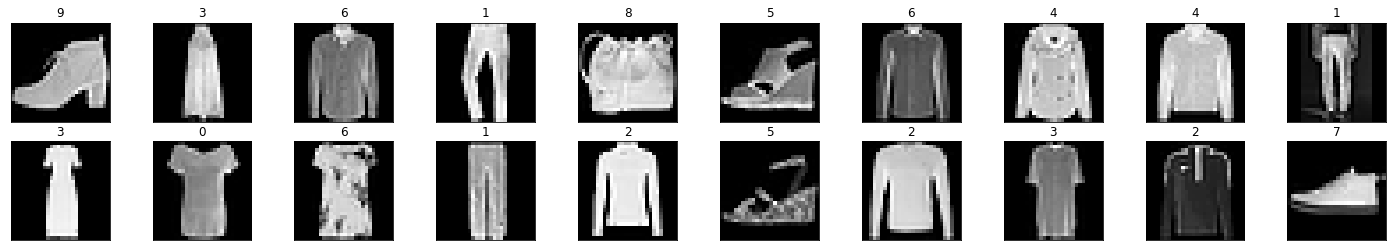

In [9]:
# CELL TO BE COMPLETED
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_iter = iter(train_loader) 
images, labels = data_iter.next() # obtain one batch from the train set
images = images.numpy()
# plot images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray') # .npsqueeze removes single-dimensional entries from the shape of an array
    ax.set_title(str(labels[idx].item())) # .item() gets the value contained in a Tensor


#### **Question 1.4** - View one of these images with more details by superimposing the greyscale intensity values directly on it. <a class="anchor" id="question_1_4"></a>

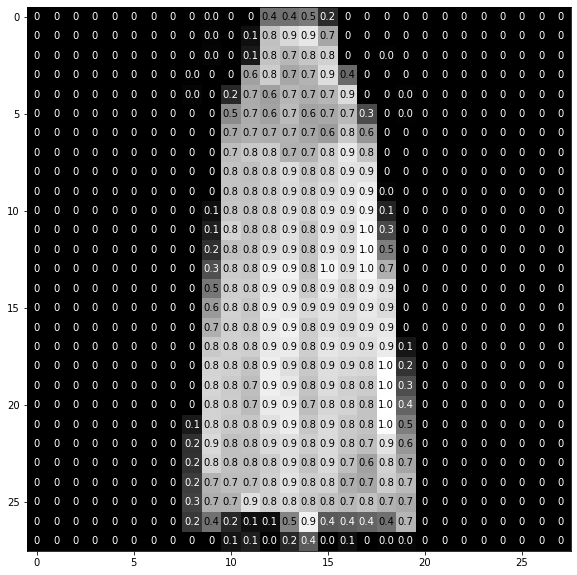

In [10]:
# CELL TO BE COMPLETED
img = np.squeeze(images[1])
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],1) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x), horizontalalignment='center', verticalalignment='center', color='white' if img[x][y]<thresh else 'black')


## 2- Multi-Layer Perceptron (MLP) <a class="anchor" id="section_2"></a>

First, let us use a multi-layer perceptron (MLP) to automatically classify Fashion-MNIST images.

#### **Question 2.1** - Define a MPL architecture with (at least) 2 fully-connected as well as dropout layers. <a class="anchor" id="question_2_1"></a>

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module): 
    def __init__(self): # FUNCTION TO BE COMPLETED
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(28*28, 14*14) # linear layer (784 -> 10)
        self.Drop = nn.Dropout(p=0.2)
        self.rel1 = nn.ReLU()
        self.fc2 = nn.Linear(14*14, 10) # linear layer (784 -> 10)


    def forward(self,x): # FUNCTION TO BE COMPLETED
        x = x.view(-1,28*28) # flatten input image
        x = self.fc1(x)
        x = self.Drop(x)
        x = self.rel1(x)
        x = self.fc2(x)
        
        
        
        return x

#### **Question 2.2** - Train the pre-defined MPL network with cross entropy as loss function and stochastic gradient descent as optimization algorithm. <a class="anchor" id="question_2_2"></a>

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device '+str(device))

Using device cpu


In [13]:
model_1 = MLP()
model_1.to(device=device)

MLP(
  (fc1): Linear(in_features=784, out_features=196, bias=True)
  (Drop): Dropout(p=0.2, inplace=False)
  (rel1): ReLU()
  (fc2): Linear(in_features=196, out_features=10, bias=True)
)

In [14]:
#DEFINE THE CRITERION
# TO DO
criterion = nn.CrossEntropyLoss() # specify loss function (categorical cross-entropy)

In [15]:
#DEFINE THE OPTIMIZER
# TO DO
optimizer = torch.optim.SGD(model_1.parameters(),lr = 0.01) # specify optimizer (stochastic gradient descent) and learning rate

In [16]:
n_epochs = 30

def training(n_epochs, train_loader, valid_loader, model, criterion, optimizer): # FUNCTION TO BE COMPLETED

  train_losses, valid_losses = [], []
  valid_loss_min = np.Inf

  for epoch in range(n_epochs):
      train_loss, valid_loss = 0, 0
      # train the model
      model.train()
      for data, label in train_loader:
          data = data.to(device=device, dtype=torch.float32)
          label = label.to(device=device, dtype=torch.long)
          #TO BE COMPLETED
          #...  
          optimizer.zero_grad() # clear the gradients of all optimized variables
          output = model(data) # forward pass: compute predicted outputs by passing inputs to the model
          loss = criterion(output, label) # calculate the loss
          loss.backward() # backward pass: compute gradient of the loss with respect to model parameters
          optimizer.step() # perform a single optimization step (parameter update)
          train_loss += loss.item() * data.size(0) # update running training loss
      
      # validate the model      
      model.eval()
      for data, label in valid_loader:
          data = data.to(device=device, dtype=torch.float32)
          label = label.to(device=device, dtype=torch.long)
          #TO BE COMPLETED
          #...  
          with torch.no_grad():
            output = model(data)
          loss = criterion(output,label)
          valid_loss += loss.item() * data.size(0)
            
            
      train_loss /= len(train_loader.sampler)
      valid_loss /= len(valid_loader.sampler)
      train_losses.append(train_loss)
      valid_losses.append(valid_loss)
      
      print('epoch: {} \ttraining Loss: {:.6f} \tvalidation Loss: {:.6f}'.format(epoch+1, train_loss, valid_loss))

      if valid_loss <= valid_loss_min:
          print('validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
          valid_loss_min,
          valid_loss))
          torch.save(model.state_dict(), 'model.pt')
          valid_loss_min = valid_loss
      
  return train_losses, valid_losses      

In [17]:
#RUN THE TRAINING FUNCTION
# TO DO
train_losses_1, valid_losses_1 = training(n_epochs, train_loader, valid_loader, model_1, criterion, optimizer)

epoch: 1 	training Loss: 0.876915 	validation Loss: 0.596786
validation loss decreased (inf --> 0.596786).  Saving model ...
epoch: 2 	training Loss: 0.560433 	validation Loss: 0.510856
validation loss decreased (0.596786 --> 0.510856).  Saving model ...
epoch: 3 	training Loss: 0.496776 	validation Loss: 0.475061
validation loss decreased (0.510856 --> 0.475061).  Saving model ...
epoch: 4 	training Loss: 0.461429 	validation Loss: 0.450885
validation loss decreased (0.475061 --> 0.450885).  Saving model ...
epoch: 5 	training Loss: 0.438090 	validation Loss: 0.428912
validation loss decreased (0.450885 --> 0.428912).  Saving model ...
epoch: 6 	training Loss: 0.420861 	validation Loss: 0.416686
validation loss decreased (0.428912 --> 0.416686).  Saving model ...
epoch: 7 	training Loss: 0.404912 	validation Loss: 0.405852
validation loss decreased (0.416686 --> 0.405852).  Saving model ...
epoch: 8 	training Loss: 0.393135 	validation Loss: 0.401458
validation loss decreased (0.40585

#### **Question 2.3** - Plot the evolution of the loss function for both training and validation sets with respect to epochs to study the convergence of the training process. <a class="anchor" id="question_2_3"></a>

Text(0, 0.5, 'loss value')

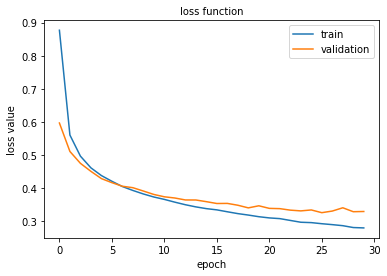

In [18]:
# CELL TO BE COMPLETED
plt.plot(range(n_epochs), train_losses_1)
plt.plot(range(n_epochs), valid_losses_1)
plt.legend(['train', 'validation'], prop={'size': 10})
plt.title('loss function', size=10)
plt.xlabel('epoch', size=10)
plt.ylabel('loss value', size=10)


Let us load the model corresponding to the lowest validation loss.

In [19]:
model_1.load_state_dict(torch.load('model.pt', map_location=device))

<All keys matched successfully>

#### **Question 2.4** - Test the best model on (unseen) test data and evaluate it’s performance in terms of overall and per-class accuracy scores. <a class="anchor" id="question_2_4"></a>

In [20]:
def evaluation(model, test_loader, criterion): 

  test_loss = 0.0
  class_correct = list(0. for i in range(10))
  class_total = list(0. for i in range(10))

  model.eval()
  for data, label in test_loader:
      data = data.to(device=device, dtype=torch.float32)
      label = label.to(device=device, dtype=torch.long)
      with torch.no_grad():
          output = model(data)
      loss = criterion(output, label)
      test_loss += loss.item()*data.size(0)
      _, pred = torch.max(output, 1)
      correct = np.squeeze(pred.eq(label.data.view_as(pred)))
      for i in range(len(label)):
          digit = label.data[i]
          class_correct[digit] += correct[i].item()
          class_total[digit] += 1

  test_loss = test_loss/len(test_loader.sampler)
  print('test Loss: {:.6f}\n'.format(test_loss))
  for i in range(10):
      print('test accuracy of %s: %2d%% (%2d/%2d)' % (class_names[i], 100 * class_correct[i] / class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])))
  print('\ntest accuracy (overall): %2.2f%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

In [21]:
#RUN THE EVALUATION FUNCTION
# TO DO
evaluation(model_1, test_loader, criterion)

test Loss: 0.343916

test accuracy of T-shirt/top: 88% (882/1000)
test accuracy of Trouser: 96% (967/1000)
test accuracy of Pullover: 80% (804/1000)
test accuracy of Dress: 90% (903/1000)
test accuracy of Coat: 82% (822/1000)
test accuracy of Sandal: 95% (956/1000)
test accuracy of Shirt: 58% (582/1000)
test accuracy of Sneaker: 93% (937/1000)
test accuracy of Bag: 96% (969/1000)
test accuracy of Ankle boot: 95% (952/1000)

test accuracy (overall): 87.74% (8774/10000)


#### **Question 2.5** - Visualize some incorrect predictions by displaying test images and labels in the format: "predicted (ground-truth)". <a class="anchor" id="question_2_5"></a>

In [22]:
def get_all_prediction(model, loader): 
    preds = torch.tensor([], dtype=torch.long)
    targets = torch.tensor([], dtype=torch.long)
    for data, label in loader:
        data = data.to(device=device, dtype=torch.float32)
        label = label.to(device=device, dtype=torch.long)
        with torch.no_grad():
            output = model(data)
        targets = torch.cat((targets, label.cpu()), dim = 0)
        preds = torch.cat((preds, torch.max(output.cpu(), 1)[1]), dim = 0)
    return targets.numpy(), preds.numpy()

In [23]:
#RUN THE GET_ALL_PREDICTION FUNCTION
# TO DO
targets, preds_1 = get_all_prediction(model_1, test_loader)

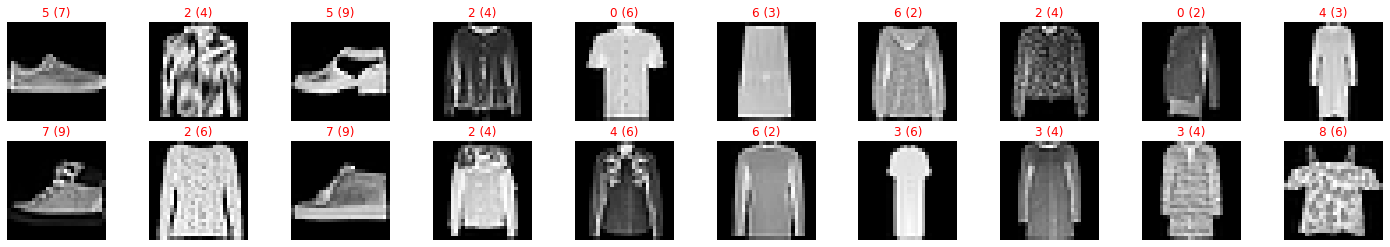

In [24]:
# CELL TO BE COMPLETED
index = np.where(preds_1 - targets != 0)[0]
test_set_array = test_data.data.numpy()
plt.figure(figsize=(25, 4))
for i in range(20):
  plt.subplot(2, 10, i + 1)
  plt.axis('off')
  plt.imshow(test_set_array[index[i],:,:], cmap='gray')
  plt.title("{} ({})".format(str(np.int(preds_1[index[i]])), str(np.int(targets[index[i]]))),color=("red"))
plt.show()


## 3- Convolutional neural network (CNN) <a class="anchor" id="section_3"></a>

Let us now switch from MLP to convolutional neural network (CNN) to classify Fashion-MNIST images.

#### **Question 3.1** - Define a CNN architecture using (at least) 2 patterns [CONV - CONV - POOL] as well as dropout and fully-connected layers. <a class="anchor" id="question_3_1"></a>

In [25]:
class CNN(nn.Module):

    def __init__(self): # FUNCTION TO BE COMPLETED
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(1,32, kernel_size=3, stride=1) # Convuntional (784 -> 10)
        self.conv2 = nn.Conv2d(32,32, kernel_size=3, stride=1) # Convuntional (784 -> 10)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(12*12*32, 10)
        self.Drop = nn.Dropout(p=0.2)
        
        
    def forward(self,x): # FUNCTION TO BE COMPLETED
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool1(x)
        x = x.view(-1,12*12*32) # flatten input image        
        out = self.fc1(x)

        return out

#### **Question 3.2** - Describe input/output sizes of each layer using summary() from torchsummary. <a class="anchor" id="question_3_2"></a>

In [26]:
from torchsummary import summary

model_2 = CNN()
model_2.to(device=device)

# CALL THE SUMMARY FUNCTION TO DISPLAY THE ARCHITECTURE


CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4608, out_features=10, bias=True)
  (Drop): Dropout(p=0.2, inplace=False)
)

#### **Question 3.3** - Train the pre-defined CNN network with cross entropy as loss function and stochastic gradient descent as optimization algorithm. <a class="anchor" id="question_3_3"></a>

In [27]:
#DEFINE THE OPTIMIZER
# TO DO
optimizer = torch.optim.SGD(model_2.parameters(),lr = 0.01)

In [28]:
#RUN THE TRAINING FUNCTION
#train_losses_2, valid_losses_2 =  # TO DO
train_losses_2, valid_losses_2 = training(n_epochs, train_loader, valid_loader, model_2, criterion, optimizer)

epoch: 1 	training Loss: 0.646803 	validation Loss: 0.459126
validation loss decreased (inf --> 0.459126).  Saving model ...
epoch: 2 	training Loss: 0.417483 	validation Loss: 0.394389
validation loss decreased (0.459126 --> 0.394389).  Saving model ...
epoch: 3 	training Loss: 0.366905 	validation Loss: 0.357157
validation loss decreased (0.394389 --> 0.357157).  Saving model ...
epoch: 4 	training Loss: 0.337385 	validation Loss: 0.357903
epoch: 5 	training Loss: 0.316733 	validation Loss: 0.340361
validation loss decreased (0.357157 --> 0.340361).  Saving model ...
epoch: 6 	training Loss: 0.301446 	validation Loss: 0.322358
validation loss decreased (0.340361 --> 0.322358).  Saving model ...
epoch: 7 	training Loss: 0.287220 	validation Loss: 0.316589
validation loss decreased (0.322358 --> 0.316589).  Saving model ...
epoch: 8 	training Loss: 0.277008 	validation Loss: 0.318570
epoch: 9 	training Loss: 0.267771 	validation Loss: 0.387064
epoch: 10 	training Loss: 0.258857 	valida

#### **Question 3.4** - Display in a single graph the loss functions for training and validation sets obtained with both MLP and CNN models. <a class="anchor" id="question_3_4"></a>

Text(0, 0.5, 'loss value')

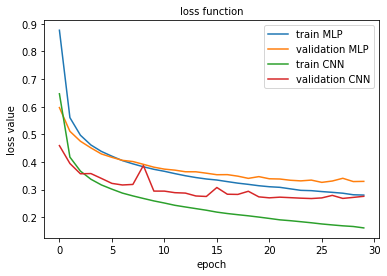

In [29]:
# CELL TO BE COMPLETED
plt.plot(range(n_epochs), train_losses_1)
plt.plot(range(n_epochs), valid_losses_1)
plt.plot(range(n_epochs), train_losses_2)
plt.plot(range(n_epochs), valid_losses_2)



plt.legend(['train MLP', 'validation MLP', 'train CNN', 'validation CNN'], prop={'size': 10})
plt.title('loss function', size=10)
plt.xlabel('epoch', size=10)
plt.ylabel('loss value', size=10)


As previously, we load the model corresponding to the lowest validation loss.

In [30]:
model_2.load_state_dict(torch.load('model.pt', map_location=device))

<All keys matched successfully>

#### **Question 3.5** - Test the model on test data and evaluate it through overall and per-class accuracy scores. Compare these scores with the ones obtained using MLP. <a class="anchor" id="question_3_5"></a>

In [31]:
#RUN THE EVALUATION FUNCTION
#evaluation(   ) # TO DO
evaluation(model_2, test_loader, criterion)

test Loss: 0.268400

test accuracy of T-shirt/top: 88% (886/1000)
test accuracy of Trouser: 98% (986/1000)
test accuracy of Pullover: 88% (887/1000)
test accuracy of Dress: 92% (928/1000)
test accuracy of Coat: 83% (831/1000)
test accuracy of Sandal: 97% (978/1000)
test accuracy of Shirt: 66% (662/1000)
test accuracy of Sneaker: 97% (973/1000)
test accuracy of Bag: 97% (975/1000)
test accuracy of Ankle boot: 95% (956/1000)

test accuracy (overall): 90.62% (9062/10000)


#### **Question 3.6** - Display CNN results for images whose prediction was incorrect with MLP. Labels should be indicated in the following format: "CNN label (ground-truth)" in red if wrong, green otherwise. <a class="anchor" id="question_3_6"></a>

In [32]:
#RUN THE GET_ALL_PREDICTION FUNCTION
#targets, preds_2 =  # TO DO
targets, preds_2 = get_all_prediction(model_2, test_loader)


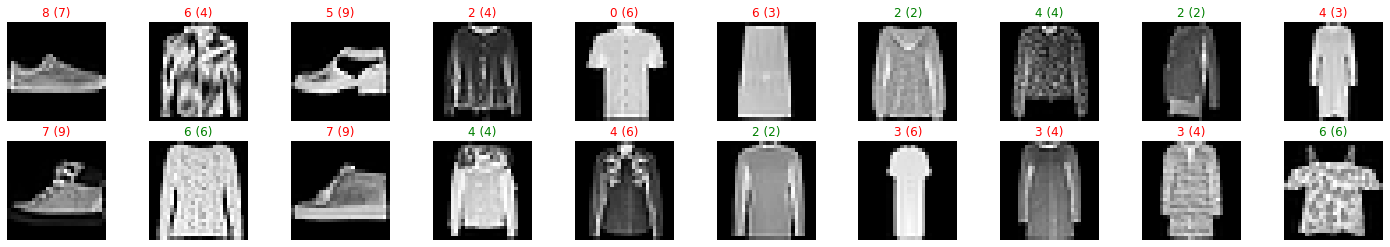

In [38]:
# CELL TO BE COMPLETED
index = np.where(preds_1 - targets != 0)[0]
test_set_array = test_data.data.numpy()
plt.figure(figsize=(25, 4))

for i in range(20):
  plt.subplot(2, 10, i + 1)
  plt.axis('off')
  plt.imshow(test_set_array[index[i],:,:], cmap='gray')
  plt.title("{} ({})".format(str(np.int(preds_2[index[i]])), str(np.int(targets[index[i]]))), color=("green" if preds_2[index[i]]==targets[index[i]] else "red"))
plt.show()





#### **Question 3.7** - Display the confusion matrix for both MLP and CNN models. <a class="anchor" id="question_3_7"></a>

In [36]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    # This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

normalized confusion matrix
normalized confusion matrix


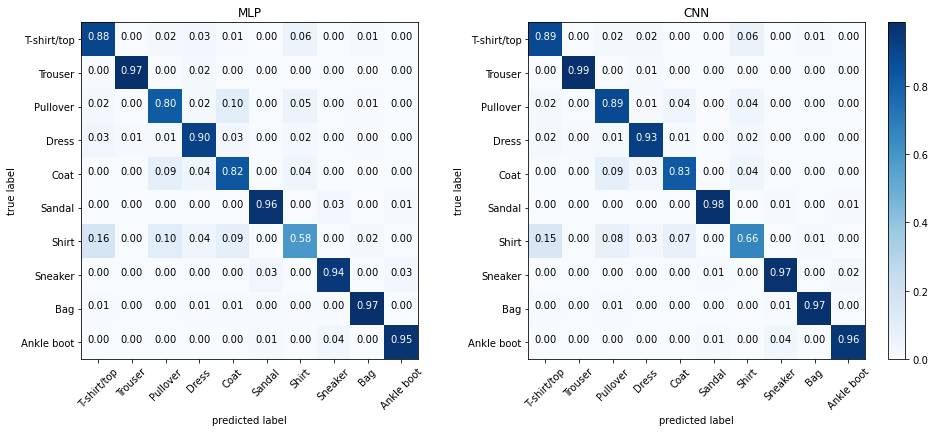

In [37]:
# CELL TO BE COMPLETED
# compute confusion matrix
cnf_matrix_MLP = confusion_matrix(targets, preds_1)
cnf_matrix_CNN = confusion_matrix(targets, preds_2)
np.set_printoptions(precision=2)

# plot normalized confusion matrixes
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix_MLP, classes=class_names, normalize=True, title='MLP')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix_CNN, classes=class_names, normalize=True, title='CNN')
plt.show()

## 4- Transfer learning from ImageNet <a class="anchor" id="section_4"></a>

Transfer learning focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

Our goal is to use a (well-known) CNN architecture whose weights have been already trained on ImageNet to perform transfer learning and fine tuning. ImageNet is a large visual database designed for visual object recognition purposes wich contains more than 14 million images!

#### **Question 4.1** - Modify the Fashion-MNIST dataset to make it fit to  ImageNet by extending Fashion-MNIST images from greyscale to 3-channels images. Since the minimal image dimension as inputs of pre-trained CNN models is 48x48, you will also need to resize images. To do so, use transform.Compose(), transforms.Resize() and transforms.Grayscale(). More details on image transformations are available in the [documentation](https://pytorch.org/docs/stable/torchvision/transforms.html). <a class="anchor" id="question_4_1"></a>

In [59]:
#CALL transforms.Compose to adapt the dataset to the VGG16 architecture
#transform =  # TO DO
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.5, hue=0.3),
    #transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15, resample=False, fillcolor=0),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 3)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_data = datasets.FashionMNIST(root = 'data', train = True, download = True, transform = transform)
test_data = datasets.FashionMNIST(root = 'data', train = False, download = True, transform = transform)

#### **Question 4.2** - Create training, validation and test data loaders. Check the dimensions of images arising from the modified Fasion-MNIST dataset. <a class="anchor" id="question_4_2"></a>

In [55]:
# CELL TO BE COMPLETED
# TODO train_loader, valid_loader, test_loader = 
train_loader, valid_loader, test_loader = create_data_loaders(batch_size, valid_size, train_data, test_data)
data_iter = iter(train_loader)   #TO DO
images, labels = data_iter.next()
print(images.numpy().shape)

(20, 3, 48, 48)


#### **Question 4.3** - Exploit a vgg16 architecture ([related paper](https://arxiv.org/pdf/1409.1556.pdf)) pre-trained on ImageNet to improve the classification scores on Fashion-MNIST through fine-tuning. See the [documentation](https://pytorch.org/docs/stable/torchvision/models.html) for further details. Use summary() from torchsummary to describe each of the vgg16 layers. To avoid a too long learning time, you may use only 5 epochs during fine-tuning. <a class="anchor" id="question_4_3"></a>

In [56]:
import torchvision.models as models

model_3 = models.vgg16(pretrained=True) # TO DO
model_3.to(device=device)
summary(model_3, (3, 48, 48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 48, 48]           1,792
              ReLU-2           [-1, 64, 48, 48]               0
            Conv2d-3           [-1, 64, 48, 48]          36,928
              ReLU-4           [-1, 64, 48, 48]               0
         MaxPool2d-5           [-1, 64, 24, 24]               0
            Conv2d-6          [-1, 128, 24, 24]          73,856
              ReLU-7          [-1, 128, 24, 24]               0
            Conv2d-8          [-1, 128, 24, 24]         147,584
              ReLU-9          [-1, 128, 24, 24]               0
        MaxPool2d-10          [-1, 128, 12, 12]               0
           Conv2d-11          [-1, 256, 12, 12]         295,168
             ReLU-12          [-1, 256, 12, 12]               0
           Conv2d-13          [-1, 256, 12, 12]         590,080
             ReLU-14          [-1, 256,

In [57]:
#DEFINE THE OPTIMIZER
#optimizer =         # TO DO
optimizer = torch.optim.SGD(model_3.parameters(),lr = 0.01)

In [58]:
n_epochs = 5
#RUN THE TRAINING FUNCTION
#train_losses_3, valid_losses_3 =     # TO DO
train_losses_3, valid_losses_3 = training(n_epochs, train_loader, valid_loader, model_3, criterion, optimizer)

epoch: 1 	training Loss: 0.795671 	validation Loss: 0.517064
validation loss decreased (inf --> 0.517064).  Saving model ...


KeyboardInterrupt: 

#### **Question 4.4** - Test the model on test data and evaluate it through overall and per-class accuracy scores. Compare these scores with the previously obtained ones. <a class="anchor" id="question_4_4"></a>

In [ ]:
model_3.load_state_dict(torch.load('model.pt', map_location=device))

In [ ]:
#RUN THE EVALUATION FUNCTION
#evaluation(   ) # TO DO
evaluation(model_3, test_loader, criterion)

#### **Question 4.5** - Display results for images whose prediction was incorrect with MLP. Labels should be indicated in the following format: "vgg16 label (ground-truth)" in red if wrong, green otherwise. <a class="anchor" id="question_4_5"></a>

In [ ]:
#RUN THE GET_ALL_PREDICTION FUNCTION
#targets, preds_3 =    # TO DO
targets, preds_3 = get_all_prediction(model_3, test_loader)

In [ ]:
# CELL TO BE COMPLETED
index = np.where(preds_1 - targets != 0)[0]
test_set_array = test_data.data.numpy()
plt.figure(figsize=(25, 4))

for i in range(20):
  plt.subplot(2, 10, i + 1)
  plt.axis('off')
  plt.imshow(test_set_array[index[i],:,:], cmap='gray')
  plt.title("{} ({})".format(str(np.int(preds_3[index[i]])), str(np.int(targets[index[i]]))), color=("green" if preds_3[index[i]]==targets[index[i]] else "red"))
plt.show()



## 5- Challenge <a class="anchor" id="section_5"></a>

#### **Question 5.1** - What is your best overall test accuracy and with which methodology? The first 3 teams will obtain bonus points! <a class="anchor" id="question_5_1"></a>